<div class="alert alert-success">

## Instructions to students

If the assignment was fetched from the assignments tab, do not change the name of the assignment file(s).

### Code answers

In questions that require you to write code, there will be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

### Submitting your work
    
You should save your work before you submit ("Save" icon in top menu).
    
Before you submit, ensure that the notebook can be run from start to finish by pressing the "Restart & Run All" option in the "Kernel" menu above.
    
Once you are ready, go to the assignments tab on the Noteable landing page and click "Submit" on the relevant assignment.

</div>

**Question 8**: Model a dark matter detector response to an important background contribution, the Radon-222 decay chain, and analyse results. This exercise combines Monte-Carlo simulation with a subsequent analysis task. The simulation task also includes writing a bespoke random number generator, for beta-decay energies, see the data and physics background section below.

**(a)**: Create the dark matter pulse model function from the script (page 24, listing 2, function `pulse()`, lines 27-35). Constant pulse parameter for pulse modelling are listed below with values, see pulse data heading. For values of the amplitude of each pulse, see part (b) below. One of the hidden tests will require your `pulse()` function by that name and the same signature (number and order of arguments) as in the script in order to pass.

For the ratio parameter: recall that this pulse model rests on the detector feature of different contributions of short and long pulse decay times depending on the nature of the energy deposition by ionizing radiation, see page 22 in the script for a description. The ratio parameter regulates this contribution weighting. The idea is to distinguish between what is called an energy deposition by `electron recoils` and `nuclear recoils`. Pulses due to the former shall have a constant ratio parameter value of `ERratio`=0.32, while the latter shall have a value of `NRratio`=2.16.

**(b)**: Create a set of 250 pulses of length 1000, i.e. a 2D array of shape (250,1000), with each column entry corresponding to 1 ns sampling (and each row is a pulse) with the composition taken from the figure (if the figure is not shown, setting the notebook to 'trusted' status should help):

![evt](rn222.png)

In summary, the decay chain on the figure consists of 2 beta-decays and 3 alpha-decays. The relevant data on the figure are the decay energies in units of keV. The decay half-life times are irrelevant for this exercise. Please ignore the indicated gamma-decays. The requested 250 pulses therefore consist of 50 pulses each for each decay in the chain.

Details on modelling the beta- and alpha-decays are given below in their own sections.

**(c)**: Fit all pulses in the data store and store the fitted amplitudes and, separately, the ratio parameters. Complicated fits really require good **starting value guesses** and **fit parameter boundaries**, both of which can be handed over to the SciPy `curve_fit()` function. It is recommended that the known constant parameter values are used as starting values for these complicated fits. Boundaries around these expected values should be physically justifiable (all time constants larger than zero for instance, and not too far away from the expectation - factors of 2 could be considered reasonable). For the amplitude starter values, it is recommended to adjust them directly from the data, i.e from each pulse to be fitted. Again, a lower bound larger than zero makes sense, a finite upper boundary may also help the process.

Each fit should be assessed with a Python function which calculates a measure of goodness-of-fit. In this case, the simplest method is sufficient: Write a function preferrably using only NumPy functions which returns the sum of the squared difference between data, the pulse, and model, the best fit pulse model. 

The reason for this requirement is that you will have to make a programmatic decision for each pulse whether the electron recoil model is a better fit or not on the basis of the goodness-of-fit value and store the corresponding amplitude and ratio parameter correspondingly. Each pulse analysis must yield unique amplitude and ratio parameter values in order for the plot in part (d) to be correct (the scatterplot should show one symbol per pulse, i.e. 250 on the canvas).

**Hint**: Remember that fits can fail and should then simply be discarded - look up and use a python try, except clause construction, i.e. error handling in python.

**(d)**: Draw a scatterplot of ratio parameters (y-axis) against amplitudes (x-axis), with appropriate axis labels. You should see a population of beta-decay pulse fitting results clearly separated from the three alpha-decay structures.

**Test requirement**: Create a NumPy array called `ratios` which contains all your best fit ratio parameter values you wish to plot in part (d). One hidden test will use that array to assess the beta- and alpha-decay populations.

#### Data and physics background section

**Pulse data**: constant pulse parameter to be used here are (see listing also listing 2, page 24 in script) `taurise`=1.0, `taushort`=6.0, `taulong`=500.0, `onset`=10.0, `baseline`=0.0.

**Noise on all pulses**: Add random noise from the Normal distribution to each calculated pulse with the scale option set to 1% of the chosen amplitude parameter.

**Alpha-decays**: Model the Alpha-decay amplitude parameter as a random number from a Gaussian distribution with mean value as given in the data figure (in keV) and standard deviation of 1% of the mean value. An additional amplitude multiplication factor of 0.5, called the quenching factor, should be applied. This takes account of the lower energy deposition measurement of highly ionizing radiation like nuclear recoils and alpha-decay daughters. Alpha-decays produce nuclear-recoil-like pulses.

**Beta-decays**: Beta-decays produce electron recoil pulses. Here, we assume that their continuous energy distribution follows a simple Fermi-decay description. This allows to model them simply with the end-point energy, the Q-value, of the decay. The Q-value for each beta-decay is given in the data figure (in keV).

Model beta-decays by creating the probability distribution of decay energies according to the distribution (in natural units): $N(T)=F(T)\,p\,E\,(Q-T)^{2}$, with $T$ the electron kinetic energy (in keV), using the relativistic momentum in natural units as $p=\sqrt{T\,(T+2\,m_e)}$, $E=T+m_{e}$ the total electron energy, $Q$ is the Q-value in keV and the Fermi function $F(T)$. Here $F(T)=2\pi\eta/(1-e^{-2\pi\eta})$, with $\eta=\alpha\,E/p$, where $\alpha=1/137$ is the fine structure constant (and I set the charge of the daughter to 1 for simplicity, in case you look up that formula).

For your convenience, calculate the electron mass $m_{e}$ in units of keV, for instance using values from the SciPy constants library (which uses SI units) as: `electronmass = m_e*c**2 /eV /1000.0 # [keV]`, with `m_e, c, eV` all constants from the library.

Turning that distribution into a probability distribution for the electron kinetic energy requires you to normalize it for the entire energy range, up to the end-point, the Q-value. As lower bound, it is recommended, avoiding the unphysical zero value (division by zero in the Fermi factor) and set it to a small value of 0.01 keV. 

Once normalised, build the cumulative distribution from which you can then draw bespoke random beta-decay energy values as explained in the script (from page 60, section 4.2.2, step 6 in the recipe is not required here - unnecessary precision). In short, if you draw the cumulative distribution, values 0-1 on the y-axis, electron energies up to the Q-value on the x-axis, then pick a random number between zero and one and from the corresponding point on the curve, take the x-axis value as your bespoke random number.

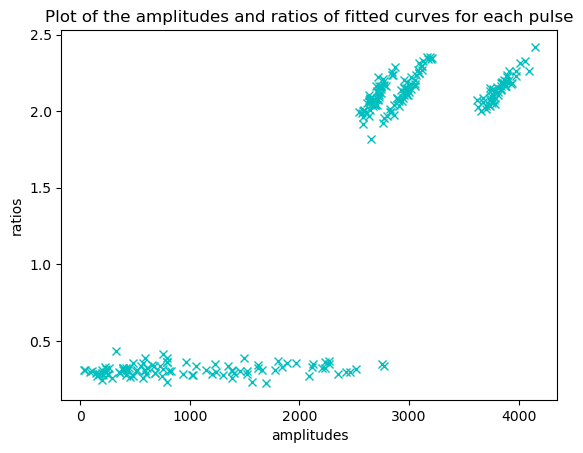

In [7]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants
import random

#pulse function direct from lecture notes (FUTURE OWEN, UPDATE IF CHANGED)
def pulse(t, scale, onset, baseline, ratio, taurise, taushort, taulong):
    denominator = ratio+1
    temp1 = ratio / (denominator) * np.exp(-(t-onset)/taushort)
    temp2 = 1.0 / (denominator) * np.exp(-(t-onset)/taulong)
    decay = temp1 + temp2
    pulse = scale * (np.exp(-(t-onset)/taurise) - decay) + baseline
    pulse[np.where(t<onset)] = 0.0
    return pulse

def brn_Fd(Q): #bespoke random number generator based on Fermi decay.
    T = np.arange(Q+1.0) #[keV]
    T[0] = 0.01
    electronmass = constants.m_e*constants.c**2/constants.eV /1000.0
    E = T + electronmass #total electron energy
    p = (T * (T+2*electronmass))**(1/2) #relativistic momentum
    eta = E/(137 * p) #directly substituted fine structure constant (alpha = 1/137) into formula
    F = (2*np.pi*eta)/(1-np.exp(-2*np.pi*eta)) #Fermi function
    N = F*p*E*(Q - T)**2 #distribution
    
    bin_differences = np.diff(T,append = T[-1])
    norm = np.sum(N*bin_differences)
    prob_dist=N/norm
    cpd = np.cumsum(prob_dist*bin_differences) #cumulative probability distribution
    
    rand_num = random.random()
    brn = T[np.where(cpd >= rand_num)][0]
    return brn

def inverse_model(v_m,t_m,ratio,cnfg):#v_m is in our case the min voltage (peak) and t_m the time of that voltage but any voltage-time paring would still work
    os = cnfg[0] # onset
    bl = cnfg[1] #baseline
    tr = cnfg[2] #taurise
    ts = cnfg[3] #taushort
    tl = cnfg[4] #taulong
    denom = ratio + 1.0 #denominator
    temp1 = (ratio/denom) * np.exp(-(t_m-os)/ts)
    temp2 = (1.0/denom) * np.exp(-(t_m-os)/tl)
    in_sq_brac = np.exp(-(t_m-os)/tr) - temp1 - temp2
    amp = (v_m - bl) / in_sq_brac
    return amp

def goodness(time, data, param_ER, param_NR):
    pulse_fit_ER = pulse(time, *param_ER)
    pulse_fit_NR = pulse(time, *param_NR)
    LS_ER = np.sum((pulse_fit_ER-data)**2)
    LS_NR = np.sum((pulse_fit_NR-data)**2)
    if LS_ER > LS_NR:
        return param_NR
    else:
        return param_ER

"""
Plan:
define functions for both alpha and beta decay based on their descriptions above. Return a single pulse without noise.
For beta decay, make use of some other calculation functions to simplify
Also returning amplitudes to make noisy
"""
#alpha decay function
def alpha_decay(time, cnfg, vltg):
    amp = 0.5*np.random.normal(vltg,0.01*vltg)
    os = cnfg[0] # onset
    bl = cnfg[1] #baseline
    NRratio = 2.16 #nuclear recoils
    tr = cnfg[2] #taurise
    ts = cnfg[3] #taushort
    tl = cnfg[4] #taulong
    a_pulse = pulse(time,amp,os,bl,NRratio,tr,ts,tl)
    return a_pulse, amp

def beta_decay(time, cnfg, vltg):
    amp = brn_Fd(vltg)
    os = cnfg[0] # onset
    bl = cnfg[1] #baseline
    ERratio = 0.32 #electron recoils
    tr = cnfg[2] #taurise
    ts = cnfg[3] #taushort
    tl = cnfg[4] #taulong
    b_pulse = pulse(time,amp,os,bl,ERratio,tr,ts,tl)
    return b_pulse, amp

"""
Plan:
For each step, define the keV, draw the pulse based on if it's alpha or beta, then add noise. Repeat 50 times and return block of 50.
"""
#Radon to Polonium218 function
def Rn_Po(time,cnfg):
    e_voltage = 5490.0 #[keV]
    frame = []
    for _ in range(50):
        alpha_pulse, amp = alpha_decay(time,cnfg,e_voltage)
        noisy = np.random.normal(alpha_pulse, scale = 0.01*amp)
        frame.append(noisy)
    return frame

#Polonium218 to Lead214
def Po218_Pb214(time,cnfg):
    e_voltage = 6000.0 #[keV]
    frame = []
    for _ in range(50):
        alpha_pulse, amp = alpha_decay(time,cnfg,e_voltage)
        noisy = np.random.normal(alpha_pulse, scale = 0.01*amp)
        frame.append(noisy)
    return frame

#Lead214 to Bismuth
def Pb_Bi(time,cnfg):
    e_voltage = 1030.0 #[keV]
    frame = []
    for _ in range(50):
        beta_pulse, amp = beta_decay(time,cnfg,e_voltage)
        noisy = np.random.normal(beta_pulse, scale = 0.01*amp)
        frame.append(noisy)
    return frame

#Bismuth to Polonium214
def Bi_Po(time,cnfg):
    e_voltage = 3270.0 #[keV]
    frame = []
    for _ in range(50):
        beta_pulse, amp = beta_decay(time,cnfg,e_voltage)
        noisy = np.random.normal(beta_pulse, scale = 0.01*amp)
        frame.append(noisy)
    return frame

#Polonium214 to Lead210
def Po214_Pb210(time,cnfg):
    e_voltage = 7690.0 #[keV]
    frame = []
    for _ in range(50):
        alpha_pulse, amp = alpha_decay(time,cnfg,e_voltage)
        noisy = np.random.normal(alpha_pulse, scale = 0.01*amp)
        frame.append(noisy)
    return frame
#producing the data, i.e., 250x1000 matrix
"""
Plan:
Have functions for each step in the decay then append to results the 50 pulses produced from each step

"""
def data_production(time, cnfg):
    results = []
    step = [Rn_Po, Po218_Pb214, Pb_Bi, Bi_Po, Po214_Pb210]
    for i in range (5):
        results.append(step[i](time,cnfg))
    results3d = np.array(results)
    results2d = results3d.reshape(250,1000)
    return results2d

"""
Plan:
Will fit curves using values in config and use np.min to find where and what the peak is in order to find a good estimate for
the amplitude (by reversing the equation?).
try both ratio values and find the better fit using a separate function(hopefully also finds the correct ratio value used for that pulse)
once fit, return the amplitude and ratio for each pulse in separate arrays (.append will be useful as usual)
"""
#analysis function
def analysis(time, data, cnfg):
    fit_amp = []
    fit_rat = []
    #fit_chosen = []
    for i in range(250):
        pulse_data = data[i]
        #finding an amplitude guess
        peak_data = -1*np.max(abs(pulse_data))
        peak_time = time[np.where(pulse_data == peak_data)][0]
        amp_ER = inverse_model(peak_data, peak_time, 0.32, cnfg)
        amp_NR = inverse_model(peak_data, peak_time, 2.16, cnfg)
        #initial guess
        init_ER = [amp_ER,cnfg[0],cnfg[1],0.32,cnfg[2],cnfg[3],cnfg[4]]
        init_NR = [amp_NR,cnfg[0],cnfg[1],2.16,cnfg[2],cnfg[3],cnfg[4]]
        fit_ER_success = False
        fit_NR_success = False
        try:
            fit_par_ER, _ = curve_fit(pulse, time, pulse_data,
                                      p0 = init_ER
        #                              ,bounds = ([0,0,0,0,0,0,0],
        #                                        [amp_ER*2,cnfg[0]*2,0.01,0.64,cnfg[2]*2,cnfg[3]*2,cnfg[4]*2]) removed on purpose
                                     )
            fit_ER_success = True
        except(RuntimeError, ValueError):
            pass
        try:
            fit_par_NR, _ = curve_fit(pulse, time, pulse_data,
                                      p0 = init_NR
            #                          ,bounds = ([0,0,0,0,0,0,0],
            #                                    [amp_NR*2,cnfg[0]*2,0.01,4.32,cnfg[2]*2,cnfg[3]*2,cnfg[4]*2])
                                     )
            fit_NR_success = True
        except(RuntimeError, ValueError):
            pass
        if fit_ER_success == True and fit_NR_success == False:
            fit_amp.append(fit_par_ER[0])
            fit_rat.append(fit_par_ER[3])
            #fit_chosen.append('ER')
        elif fit_ER_success == False and fit_NR_success == True:
            fit_amp.append(fit_par_NR[0])
            fit_rat.append(fit_par_NR[3])
            #fit_chosen.append('NR')
        elif fit_ER_success == True and fit_NR_success == True:
            best_par = goodness(time,data,fit_par_ER,fit_par_NR)
            fit_amp.append(best_par[0])
            fit_rat.append(best_par[3])
            #fit_chosen.append('best')
        else:
            fit_amp.append(None)
            fit_rat.append(None)
            #fit_chosen.append(None)
    return np.array(fit_amp), np.array(fit_rat) #, np.array(fit_chosen)

#main code
timevalues = np.linspace(0,999,1000)
onset = 10.0
baseline = 0.0
taurise = 1.0
taushort = 6.0
taulong = 500.0
config = [onset,baseline,taurise,taushort,taulong]

pulses = data_production(timevalues,config)

amplitudes, ratios = analysis(timevalues,pulses,config)

plt.plot(amplitudes,ratios,'xc')
plt.title("Plot of the amplitudes and ratios of fitted curves for each pulse")
plt.xlabel("amplitudes")
plt.ylabel("ratios")
plt.show()

#test space

#print (pulses)
#print (amplitudes)
#print (ratios)
#print (fit)

# plt.plot(timevalues,pulses[0],label = "Radon to Polonium")
# plt.plot(timevalues,pulses[50],label = "Polonium218 to Lead")
# plt.plot(timevalues,pulses[100],label = "Lead to Bismuth")
# plt.plot(timevalues,pulses[150],label = "Bismuth to Polonium")
# plt.plot(timevalues,pulses[200],label = "Polonium214 to Lead")
# plt.legend()
# plt.show()

In [2]:
print (ratios)
x = np.where(ratios >= 0.5)
y = np.where(ratios <= 1.8)
u = np.intersect1d(x,y)
print (x)
print (y)
print (u)
for i in u:
    plt.plot(timevalues,pulses[i])
plt.show()

[2.08097078 2.18862348 2.05597909 2.03098916 2.23081536 2.22069083
 2.12936938 2.20576299 1.94479191 2.16547735 2.14916958 2.05022553
 2.13660267 2.24654502 2.21253529 2.03882645 2.09051084 2.19351657
 2.07138036 2.12370407 2.05006395 1.99387517 2.02999991 2.07908366
 2.17645696 2.14750878 2.03340509 2.2947478  2.07543385 2.08213963
 2.1707221  2.28165568 2.31801188 1.92082047 2.07814709 1.99605815
 2.08625334 2.20885037 2.11218319 1.96057174 2.19359269 1.89798702
 2.04849555 2.19970113 2.07894229 1.99021041 2.20641795 2.12821212
 2.0792989  2.33282791 1.96889755 2.18006336 2.17545241 2.23567409
 2.08208923 2.04830885 2.31458233 2.23094833 2.24258886 2.10637568
 2.12678125 2.06423971 2.23714152 2.16688387 2.21438563 1.98849303
 2.0698866  2.12088924 1.86168684 2.39122967 2.11069019 2.28396165
 2.302438   2.09727128 2.30758582 2.11191442 2.06691693 2.12891936
 2.22894321 2.2438991  1.95681848 2.13576895 2.14983336 1.96572218
 2.00441016 2.18742589 2.13537977 2.13215014 2.11303955 2.1906

Manual plot marking with feedback where appropriate.

In [3]:
# Test cell, do not delete
# test pulse() function

In [4]:
# Test cell, do not delete
# test ratios array, allow for 10 ratios to be wrong

### Tests 7 marks; Plot - 5 marks